In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Load the long format df

In [4]:
df_long = pd.read_csv('datasets/NPAS_parsed_trunc_long_missing.csv')

df_long.head()

,subject_id,variable,value
0,1,education,4.0
1,2,education,3.0
2,5,education,2.0
3,6,education,2.0
4,7,education,2.0


In [5]:
df_long.sort_values(by=['subject_id','variable']).head()

,subject_id,variable,value
41084,0,academic_over_social,5.0
54994,0,anxious,1.0
20219,0,bookish,5.0
18828,0,books_over_parties,5.0
46648,0,calm,7.0


In [6]:
print(df_long.shape)

(70295, 3)


# Normal pivot

In [7]:
df_wide = df_long.pivot(index='subject_id', columns='variable', values='value')
df_wide.head()

variable,academic_over_social,age,anxious,bookish,books_over_parties,calm,collect_books,conventional,critical,dependable,...,religion,reserved,socially_awkward,strange_person,sympathetic,urban,voted,was_odd_child,watch_science_shows,writing_novel
subject_id,,,,,,,,,,,,,,,,,,,,,
0,5.0,NaN,1.0,5.0,5.0,7.0,5.0,1.0,1.0,7.0,...,NaN,7.0,5.0,5.0,7.0,NaN,NaN,5.0,5.0,3.0
1,2.0,50.0,4.0,4.0,4.0,6.0,5.0,1.0,3.0,5.0,...,1.0,5.0,5.0,4.0,5.0,2.0,1.0,3.0,5.0,1.0
2,5.0,22.0,7.0,5.0,5.0,2.0,5.0,1.0,6.0,3.0,...,1.0,7.0,5.0,5.0,2.0,1.0,1.0,5.0,5.0,4.0
3,5.0,NaN,4.0,4.0,5.0,7.0,5.0,1.0,2.0,7.0,...,NaN,2.0,5.0,5.0,6.0,NaN,NaN,5.0,5.0,4.0
4,4.0,NaN,3.0,5.0,5.0,6.0,4.0,2.0,5.0,4.0,...,NaN,6.0,0.0,5.0,5.0,NaN,NaN,5.0,4.0,1.0


In [8]:
df_wide.columns

Index(['academic_over_social', 'age', 'anxious', 'bookish',
       'books_over_parties', 'calm', 'collect_books', 'conventional',
       'critical', 'dependable', 'diagnosed_autistic', 'disorganized',
       'education', 'engnat', 'enjoy_learning', 'excited_about_research',
       'extraverted', 'familysize', 'gender', 'hand', 'hobbies_over_people',
       'in_advanced_classes', 'intelligence_over_appearance',
       'interested_science', 'introspective', 'libraries_over_publicspace',
       'like_dry_topics', 'like_hard_material', 'like_science_fiction',
       'like_superheroes', 'major', 'married', 'online_over_inperson',
       'opennness', 'play_many_videogames', 'playes_rpgs',
       'prefer_fictional_people', 'race_arab', 'race_asian', 'race_black',
       'race_hispanic', 'race_native_american', 'race_native_austrailian',
       'race_nerdy', 'race_white', 'read_tech_reports', 'religion', 'reserved',
       'socially_awkward', 'strange_person', 'sympathetic', 'urban', 'voted',


In [9]:
df_wide.columns.name

'variable'

In [10]:
df_wide.columns.name = None
df_wide.head()

,academic_over_social,age,anxious,bookish,books_over_parties,calm,collect_books,conventional,critical,dependable,...,religion,reserved,socially_awkward,strange_person,sympathetic,urban,voted,was_odd_child,watch_science_shows,writing_novel
subject_id,,,,,,,,,,,,,,,,,,,,,
0,5.0,NaN,1.0,5.0,5.0,7.0,5.0,1.0,1.0,7.0,...,NaN,7.0,5.0,5.0,7.0,NaN,NaN,5.0,5.0,3.0
1,2.0,50.0,4.0,4.0,4.0,6.0,5.0,1.0,3.0,5.0,...,1.0,5.0,5.0,4.0,5.0,2.0,1.0,3.0,5.0,1.0
2,5.0,22.0,7.0,5.0,5.0,2.0,5.0,1.0,6.0,3.0,...,1.0,7.0,5.0,5.0,2.0,1.0,1.0,5.0,5.0,4.0
3,5.0,NaN,4.0,4.0,5.0,7.0,5.0,1.0,2.0,7.0,...,NaN,2.0,5.0,5.0,6.0,NaN,NaN,5.0,5.0,4.0
4,4.0,NaN,3.0,5.0,5.0,6.0,4.0,2.0,5.0,4.0,...,NaN,6.0,0.0,5.0,5.0,NaN,NaN,5.0,4.0,1.0


In [11]:
df_wide.head()

,academic_over_social,age,anxious,bookish,books_over_parties,calm,collect_books,conventional,critical,dependable,...,religion,reserved,socially_awkward,strange_person,sympathetic,urban,voted,was_odd_child,watch_science_shows,writing_novel
subject_id,,,,,,,,,,,,,,,,,,,,,
0,5.0,NaN,1.0,5.0,5.0,7.0,5.0,1.0,1.0,7.0,...,NaN,7.0,5.0,5.0,7.0,NaN,NaN,5.0,5.0,3.0
1,2.0,50.0,4.0,4.0,4.0,6.0,5.0,1.0,3.0,5.0,...,1.0,5.0,5.0,4.0,5.0,2.0,1.0,3.0,5.0,1.0
2,5.0,22.0,7.0,5.0,5.0,2.0,5.0,1.0,6.0,3.0,...,1.0,7.0,5.0,5.0,2.0,1.0,1.0,5.0,5.0,4.0
3,5.0,NaN,4.0,4.0,5.0,7.0,5.0,1.0,2.0,7.0,...,NaN,2.0,5.0,5.0,6.0,NaN,NaN,5.0,5.0,4.0
4,4.0,NaN,3.0,5.0,5.0,6.0,4.0,2.0,5.0,4.0,...,NaN,6.0,0.0,5.0,5.0,NaN,NaN,5.0,4.0,1.0


In [12]:
print(df_wide.shape)
print(df_wide.shape[0]*df_wide.shape[1])

(1391, 56)
77896


In [13]:
# This is a way to remove the name of the index
# df_wide.index.name = None

In [14]:
df_wide = df_wide.reset_index()
df_wide.head()

,subject_id,academic_over_social,age,anxious,bookish,books_over_parties,calm,collect_books,conventional,critical,...,religion,reserved,socially_awkward,strange_person,sympathetic,urban,voted,was_odd_child,watch_science_shows,writing_novel
0,0,5.0,NaN,1.0,5.0,5.0,7.0,5.0,1.0,1.0,...,NaN,7.0,5.0,5.0,7.0,NaN,NaN,5.0,5.0,3.0
1,1,2.0,50.0,4.0,4.0,4.0,6.0,5.0,1.0,3.0,...,1.0,5.0,5.0,4.0,5.0,2.0,1.0,3.0,5.0,1.0
2,2,5.0,22.0,7.0,5.0,5.0,2.0,5.0,1.0,6.0,...,1.0,7.0,5.0,5.0,2.0,1.0,1.0,5.0,5.0,4.0
3,3,5.0,NaN,4.0,4.0,5.0,7.0,5.0,1.0,2.0,...,NaN,2.0,5.0,5.0,6.0,NaN,NaN,5.0,5.0,4.0
4,4,4.0,NaN,3.0,5.0,5.0,6.0,4.0,2.0,5.0,...,NaN,6.0,0.0,5.0,5.0,NaN,NaN,5.0,4.0,1.0


# Pivot table - pivot + aggregation functions

In [17]:
values = []
for year in [2012,2013,2014,2015]:
    for quarter in [1,2,3,4]:
        for month in [1,2,3]:
            values.append([year,quarter,month,np.random.randint(50,150),np.random.randint(300,500)])

df = pd.DataFrame(values, columns = ['year','quarter','month','sales','new_customers'])
df.head()

,year,quarter,month,sales,new_customers
0,2012,1,1,135,416
1,2012,1,2,96,332
2,2012,1,3,132,364
3,2012,2,1,59,371
4,2012,2,2,134,313


In [18]:
pd.pivot_table(df, values='sales', index=['year'], columns=['quarter'], aggfunc=np.sum)

quarter,1,2,3,4
year,,,,
2012,363,245,337,281
2013,258,314,219,346
2014,302,347,261,316
2015,259,247,355,223


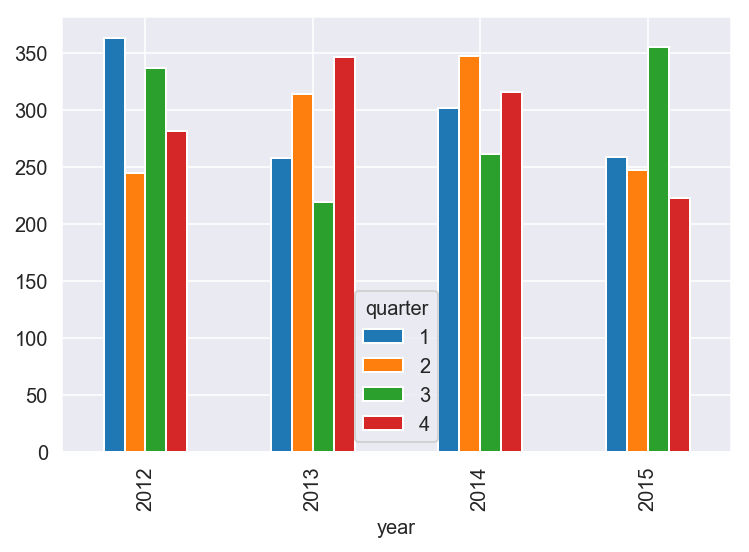

In [19]:
pd.pivot_table(df, 
               values='sales', 
               index=['year'], 
               columns=['quarter'], 
               aggfunc=np.sum).plot(kind='bar')

In [20]:
df_pivot_sum_mean = pd.pivot_table(df, values='sales', index=['year'], columns=['quarter'], aggfunc=[np.mean,np.sum])
df_pivot_sum_mean

mean                                      sum               
quarter           1           2           3           4    1    2    3    4
year                                                                       
2012     121.000000   81.666667  112.333333   93.666667  363  245  337  281
2013      86.000000  104.666667   73.000000  115.333333  258  314  219  346
2014     100.666667  115.666667   87.000000  105.333333  302  347  261  316
2015      86.333333   82.333333  118.333333   74.333333  259  247  355  223

#### We have two levels in the column names

In [21]:
df_pivot_sum_mean['mean']

quarter,1,2,3,4
year,,,,
2012,121.000000,81.666667,112.333333,93.666667
2013,86.000000,104.666667,73.000000,115.333333
2014,100.666667,115.666667,87.000000,105.333333
2015,86.333333,82.333333,118.333333,74.333333


In [22]:
df_pivot_sum_mean['mean',1]

year
2012    121.000000
2013     86.000000
2014    100.666667
2015     86.333333
Name: (mean, 1), dtype: float64

You can rename the columns to have a single level

In [23]:
df_pivot_sum_mean.columns

MultiIndex(levels=[['mean', 'sum'], [1, 2, 3, 4]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2, 3]],
           names=[None, 'quarter'])

In [24]:
# a dumb approach
new_cols = ['{}_{}'.format(l0,l1) for l0 in df_pivot_sum_mean.columns.levels[0] for l1 in df_pivot_sum_mean.columns.levels[1]]
new_cols

['mean_1', 'mean_2', 'mean_3', 'mean_4', 'sum_1', 'sum_2', 'sum_3', 'sum_4']

In [25]:
df_pivot_sum_mean.columns = new_cols
df_pivot_sum_mean

,mean_1,mean_2,mean_3,mean_4,sum_1,sum_2,sum_3,sum_4
year,,,,,,,,
2012,121.000000,81.666667,112.333333,93.666667,363,245,337,281
2013,86.000000,104.666667,73.000000,115.333333,258,314,219,346
2014,100.666667,115.666667,87.000000,105.333333,302,347,261,316
2015,86.333333,82.333333,118.333333,74.333333,259,247,355,223


#### We can create a pivot table using two values

In [26]:
pd.pivot_table(df, 
               values=['sales','new_customers'], 
               index=['year'], 
               columns=['quarter'], 
               aggfunc=np.sum)

new_customers                   sales               
quarter             1     2     3     4     1    2    3    4
year                                                        
2012             1112  1176  1212  1174   363  245  337  281
2013             1045  1305   954  1184   258  314  219  346
2014             1212  1148   946  1263   302  347  261  316
2015             1213  1209  1105  1222   259  247  355  223

#### We can create a pivot table using two values and two functions

In [27]:
pd.pivot_table(df, 
               values=['sales','new_customers'], 
               index=['year'], 
               columns=['quarter'], 
               aggfunc=[np.mean,np.median])

mean                                                  \
        new_customers                                           sales   
quarter             1           2           3           4           1   
year                                                                    
2012       370.666667  392.000000  404.000000  391.333333  121.000000   
2013       348.333333  435.000000  318.000000  394.666667   86.000000   
2014       404.000000  382.666667  315.333333  421.000000  100.666667   
2015       404.333333  403.000000  368.333333  407.333333   86.333333   

                                                   median                 \
                                            new_customers                  
quarter           2           3           4             1    2    3    4   
year                                                                       
2012      81.666667  112.333333   93.666667           364  371  419  392   
2013     104.666667   73.000000  115.333333           358  461  323  402   
2014     115.666667   87.000000  105.333333           435  395  313  392   
2015      82.333333  118.333333   74.333333           396  414  389  379   

                              
        sales                 
quarter     1    2    3    4  
year                          
2012      132   59  118   83  
2013       61  108   60  117  
2014      103  127   99  108  
2015       72   83  128   67

#### A smarter way of dealing with multi-level columns

In [28]:
pd.DataFrame(pd.pivot_table(df, 
               values=['sales','new_customers'], 
               index=['year'], 
               columns=['quarter'], 
               aggfunc=[np.mean,np.median]).to_records())

,year,"('mean', 'new_customers', 1)","('mean', 'new_customers', 2)","('mean', 'new_customers', 3)","('mean', 'new_customers', 4)","('mean', 'sales', 1)","('mean', 'sales', 2)","('mean', 'sales', 3)","('mean', 'sales', 4)","('median', 'new_customers', 1)","('median', 'new_customers', 2)","('median', 'new_customers', 3)","('median', 'new_customers', 4)","('median', 'sales', 1)","('median', 'sales', 2)","('median', 'sales', 3)","('median', 'sales', 4)"
0,2012,370.666667,392.000000,404.000000,391.333333,121.000000,81.666667,112.333333,93.666667,364,371,419,392,132,59,118,83
1,2013,348.333333,435.000000,318.000000,394.666667,86.000000,104.666667,73.000000,115.333333,358,461,323,402,61,108,60,117
2,2014,404.000000,382.666667,315.333333,421.000000,100.666667,115.666667,87.000000,105.333333,435,395,313,392,103,127,99,108
3,2015,404.333333,403.000000,368.333333,407.333333,86.333333,82.333333,118.333333,74.333333,396,414,389,379,72,83,128,67


# Melting - the opposite of pivot 
(i.e. from wide format to long format)

In [29]:
df_wide.head()

,subject_id,academic_over_social,age,anxious,bookish,books_over_parties,calm,collect_books,conventional,critical,...,religion,reserved,socially_awkward,strange_person,sympathetic,urban,voted,was_odd_child,watch_science_shows,writing_novel
0,0,5.0,NaN,1.0,5.0,5.0,7.0,5.0,1.0,1.0,...,NaN,7.0,5.0,5.0,7.0,NaN,NaN,5.0,5.0,3.0
1,1,2.0,50.0,4.0,4.0,4.0,6.0,5.0,1.0,3.0,...,1.0,5.0,5.0,4.0,5.0,2.0,1.0,3.0,5.0,1.0
2,2,5.0,22.0,7.0,5.0,5.0,2.0,5.0,1.0,6.0,...,1.0,7.0,5.0,5.0,2.0,1.0,1.0,5.0,5.0,4.0
3,3,5.0,NaN,4.0,4.0,5.0,7.0,5.0,1.0,2.0,...,NaN,2.0,5.0,5.0,6.0,NaN,NaN,5.0,5.0,4.0
4,4,4.0,NaN,3.0,5.0,5.0,6.0,4.0,2.0,5.0,...,NaN,6.0,0.0,5.0,5.0,NaN,NaN,5.0,4.0,1.0


In [30]:
df_wide.melt(id_vars=['subject_id']).head()

,subject_id,variable,value
0,0,academic_over_social,5.0
1,1,academic_over_social,2.0
2,2,academic_over_social,5.0
3,3,academic_over_social,5.0
4,4,academic_over_social,4.0
